__Name:__ Amrita Veshin <br>
__Register Number:__ 22122104

------------------------------------------------------------------------
#  <center> NLP LAB-02: PDF Word Frequency Count
------------------------------------------------------------------------


In [2]:
pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.3 MB/s eta 0:00:00


## Using PyPDF2 For Importing The PDF

In [3]:
from PyPDF2 import PdfReader
import PyPDF2

In [4]:
#creating a pdf reader object
reader=PdfReader('Base Paper.pdf')

In [5]:
print(len(reader.pages))

12


In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
    # Initializing a variable to store the extracted text
    extracted_text = ""

    # Iterating through all pages of the PDF
    for page_num in range(len(reader.pages)):
        # Extracting text from the current page
        page = reader.pages[page_num]
        page_text = page.extract_text()

        # Appending the page text to the extracted_text variable
        extracted_text += page_text

    # Processing the extracted text with SpaCy
    doc = nlp(extracted_text)

## Tokenization

In [23]:
# Removing symbols, numbers, and stop words, and get the tokens
filtered_tokens = [token.text for token in doc if not (token.is_stop or token.is_punct or token.is_digit)]


## Word Frequency Count

In [24]:
import matplotlib.pyplot as plt
from collections import Counter


In [25]:
# Counting word frequencies
word_freq = Counter(filtered_tokens)

# Getting the top 10 words by frequency
top_words = word_freq.most_common(10)

# Extracting word names and frequencies
words, frequencies = zip(*top_words)

## Plotting the Word Frequencies

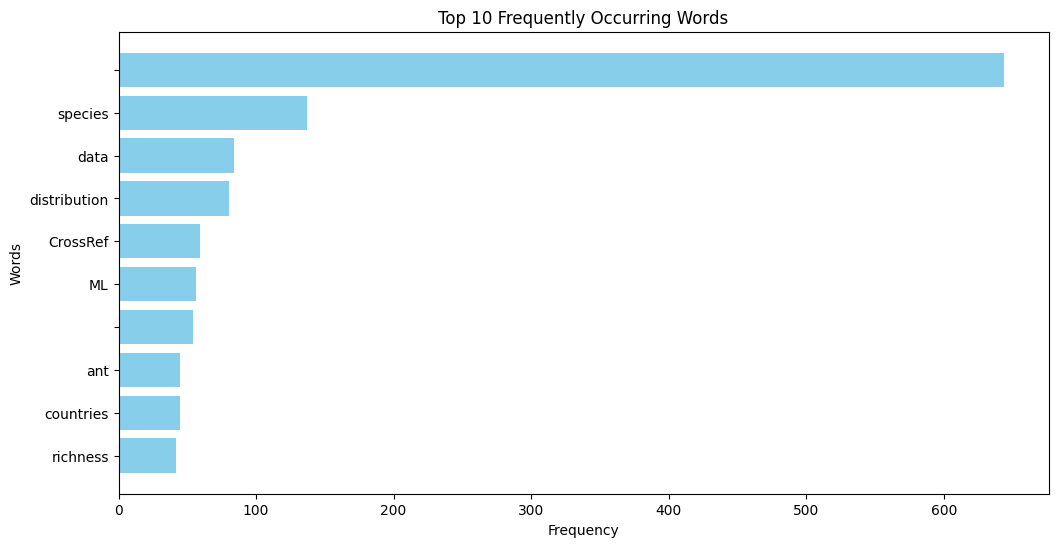

In [27]:

# Creating a bar plot for word frequencies
plt.figure(figsize=(12, 6))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Frequently Occurring Words')
plt.gca().invert_yaxis()
plt.show()


## Printing the Frequency Table

In [28]:
# Import the tabulate library for printing the output in a tabular format
from tabulate import tabulate

# Creating a table
table = [["Word", "Frequency"]]
table.extend(zip(words, frequencies))

# Printing the table using tabulate
print(tabulate(table, headers="firstrow", tablefmt="grid"))

+--------------+-------------+
| Word         |   Frequency |
+==============+=============+
|              |         644 |
+--------------+-------------+
| species      |         137 |
+--------------+-------------+
| data         |          84 |
+--------------+-------------+
| distribution |          80 |
+--------------+-------------+
| CrossRef     |          59 |
+--------------+-------------+
| ML           |          56 |
+--------------+-------------+
|              |          54 |
+--------------+-------------+
| ant          |          45 |
+--------------+-------------+
| countries    |          45 |
+--------------+-------------+
| richness     |          42 |
+--------------+-------------+


__INFERENCE:__<br>
We observe from the above graph as well as the frequency table that the word with the highest frequency is __species__ with a count of 137 occurrences in the entire pdf, followed by the words __data__ and __distribution__ with 84 and 80 occurrences respectively.   